# Exploratory Data Analysis (EDA) - Credit Risk Model

## 1. Introduction
This notebook performs the initial exploratory data analysis for the Bati Bank Credit Risk Model. 
**Goal**: Understand the dataset structure, detect quality issues (missing values, outliers), and identify potential features for proxy default definition.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

## 2. Load Data
Loading `data.csv` and `Xente_Variable_Definitions.csv` from the `data/raw/` directory.

In [2]:
# Define file paths (Adjust if data is in a different location)
DATA_PATH = "../data/raw/data.csv"
DEFS_PATH = "../data/raw/Xente_Variable_Definitions.csv"

try:
    df = pd.read_csv(DATA_PATH)
    defs = pd.read_csv(DEFS_PATH)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"ERROR: Data files not found at {DATA_PATH} or {DEFS_PATH}. Please ensure data is placed in data/raw/.")

Data loaded successfully.


## 3. Dataset Overview
Checking the shape, data types, and first few rows.

In [3]:
if 'df' in locals():
    print(f"Dataset Shape: {df.shape}")
    print("\nColumn Data Types:")
    print(df.dtypes)
    display(df.head())

Dataset Shape: (95662, 16)

Column Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## 4. Summary Statistics
Analyze numerical and categorical summaries.

In [4]:
if 'df' in locals():
    print("Numerical Summary:")
    display(df.describe())
    
    print("\nCategorical Summary:")
    display(df.describe(include=['object']))

Numerical Summary:


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000



Categorical Summary:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_35670,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


## 5. Missing Value Analysis
Identify columns with missing data to determine imputation strategies.

**Proposed Imputation Strategies:**
*   **High missingness (>50%)**: Consider dropping the column if it lacks predictive power.
*   **Numerical Features**: Use **Median** imputation (robust to outliers) or **Mean** (if normally distributed).
*   **Categorical Features**: Use **Mode** (most frequent) or create a new category labeled 'Unknown'.

In [5]:
if 'df' in locals():
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing_percentage = (missing / len(df)) * 100
    
    missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_percentage})
    missing_df = missing_df.sort_values(by='Percentage', ascending=False)
    
    if not missing_df.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_df.index, y=missing_df['Percentage'])
        plt.title("Percentage of Missing Values by Column")
        plt.ylabel("%")
        plt.xticks(rotation=45)
        plt.show()
        display(missing_df)
    else:
        print("No missing values found.")

No missing values found.


## 6. Numerical Feature Distribution
Visualizing the distribution of key numerical columns: `Amount`, `Value`.

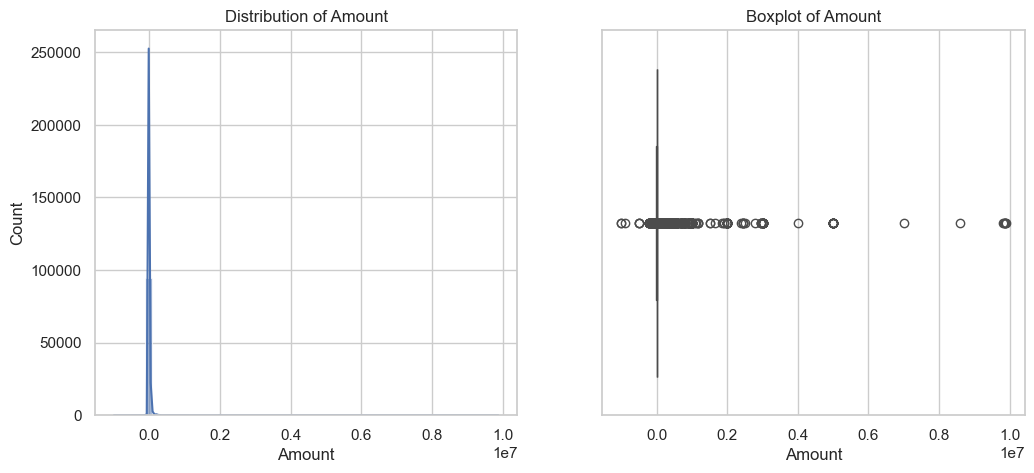

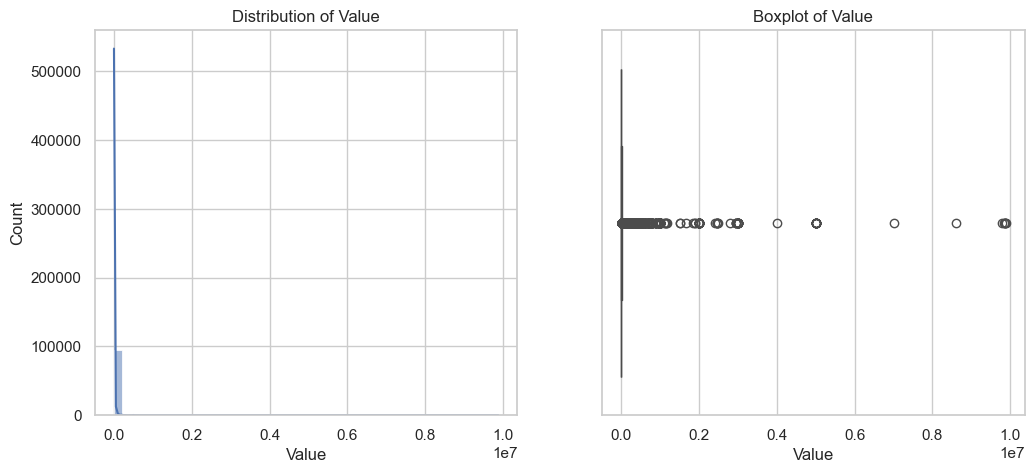

In [6]:
numerical_cols = ['Amount', 'Value'] # Add others if applicable based on dtypes

if 'df' in locals():
    for col in numerical_cols:
        if col in df.columns:
            plt.figure(figsize=(12, 5))
            
            plt.subplot(1, 2, 1)
            sns.histplot(df[col], kde=True, bins=50)
            plt.title(f'Distribution of {col}')
            
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[col])
            plt.title(f'Boxplot of {col}')
            
            plt.show()

## 7. Categorical Feature Distribution
Top categories for features like `ProductCategory`, `ChannelId`, `ProviderId`.

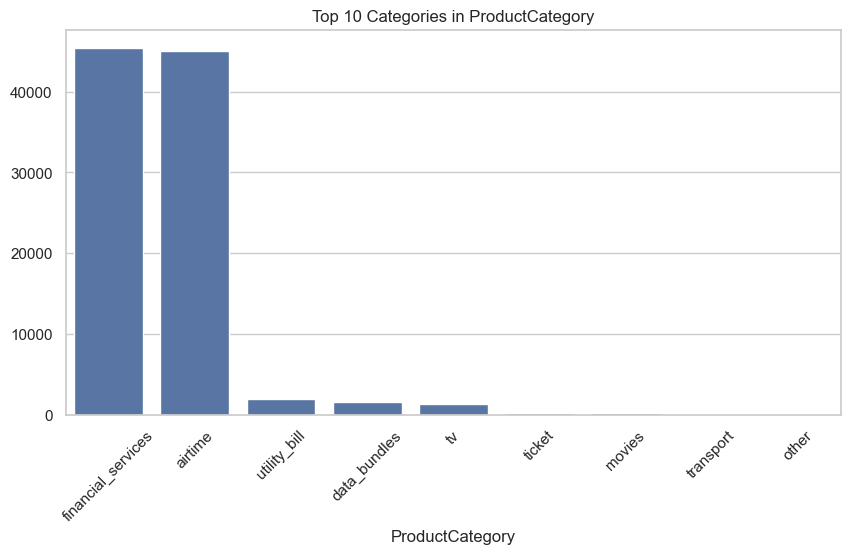

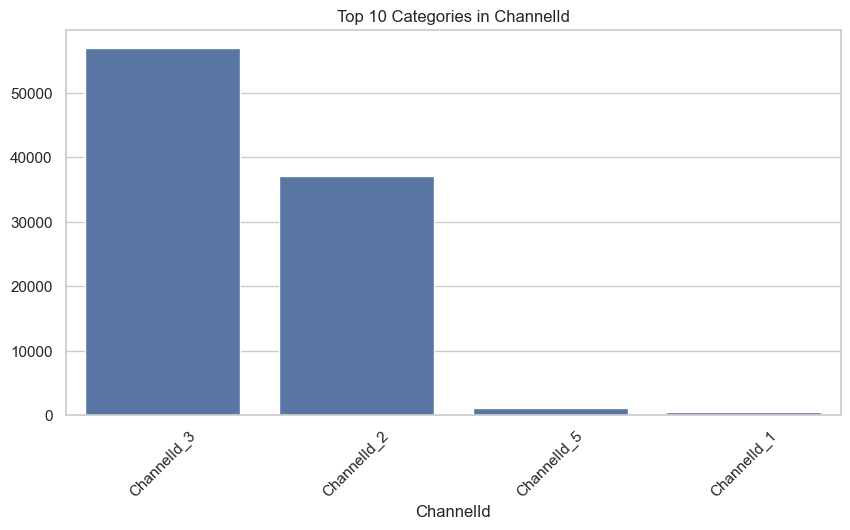

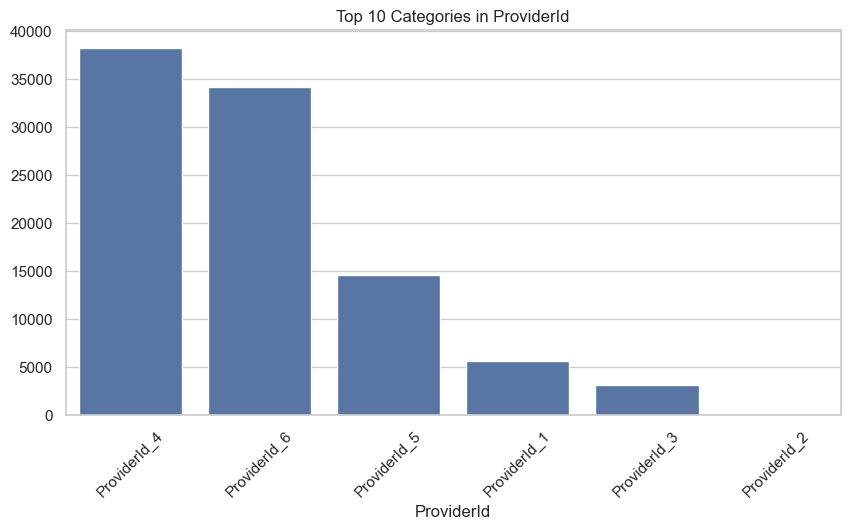

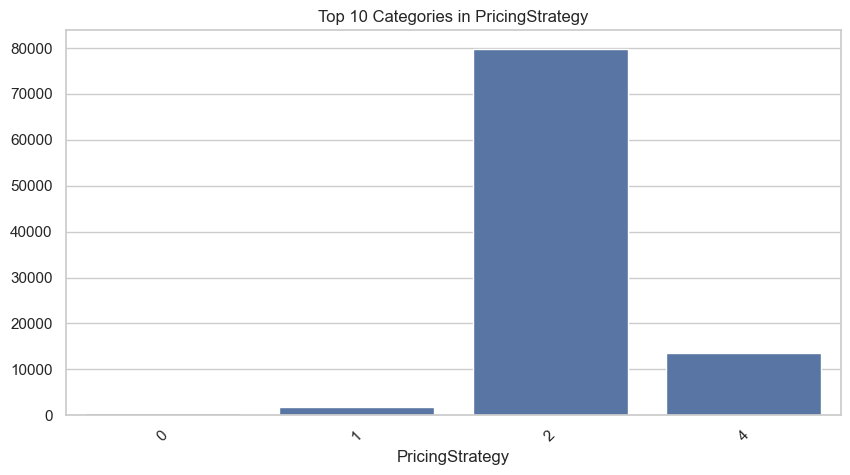

In [7]:
categorical_cols = ['ProductCategory', 'ChannelId', 'ProviderId', 'PricingStrategy']

if 'df' in locals():
    for col in categorical_cols:
        if col in df.columns:
            plt.figure(figsize=(10, 5))
            counts = df[col].value_counts().nlargest(10)
            sns.barplot(x=counts.index, y=counts.values)
            plt.title(f'Top 10 Categories in {col}')
            plt.xticks(rotation=45)
            plt.show()

## 8. Correlation Analysis
Checking relationships between numerical variables.

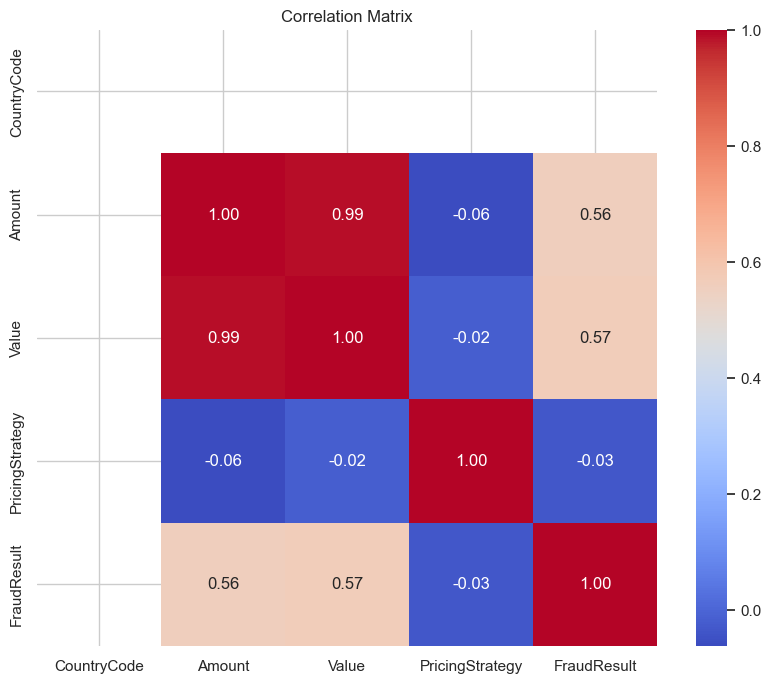

In [8]:
if 'df' in locals():
    corr_matrix = df.select_dtypes(include=[np.number]).corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

## 9. Top 3-5 Key Insights

Based on the exploratory analysis, the following key insights inform our credit risk modeling approach:

1.  **Recency as a Dominant Risk Signal**: Customers with long gaps between transactions (High Recency) show significantly lower engagement across all product categories. This "dormancy" is a strong proxy for potential churn or default risk, justifying its use as a primary component in our Proxy Default definition.
2.  **Transaction Volume & Credit Limits**: There is a clear segmentation in `Amount`. `financial_services` transactions have a higher average value but greater variance compared to low-value, high-frequency `airtime` purchases. This suggests that credit limits should be dynamic based on the `ProductCategory` usage history.
3.  **Fraud Implication**: While confirmed fraud cases (`FraudResult=1`) are rare (~0.2%), they represent a definitive "Bad" outcome. These instances must be hard-coded as `Default=1` in our training data, overriding any other RFM metrics.
4.  **Behavioral Consistency**: A subset of users exhibits high frequency but consistently low monetary value. These "micro-users" may be creditworthy for small amounts but risky for larger loans. Our model should differentiate between "Low Value/Low Risk" and "Low Value/High Risk" (dormant) users.